In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import os
import random
from sklearn.preprocessing import minmax_scale
import warnings
import math
import shutil
from pydub import AudioSegment

In [2]:
warnings.filterwarnings("ignore")

In [5]:
def get_random_audios(folder, size):
    filenames = [file for file in os.listdir(folder) if os.path.isfile(os.path.join(folder, file))]
    chosen = random.sample(filenames, size)

    return [librosa.core.load(os.path.join(folder, file)) for file in chosen]

In [6]:
bulerias_sample = get_random_audios("../../assets/audios/bulerias", 4)
alegrias_sample = get_random_audios("../../assets/audios/alegrias", 4)

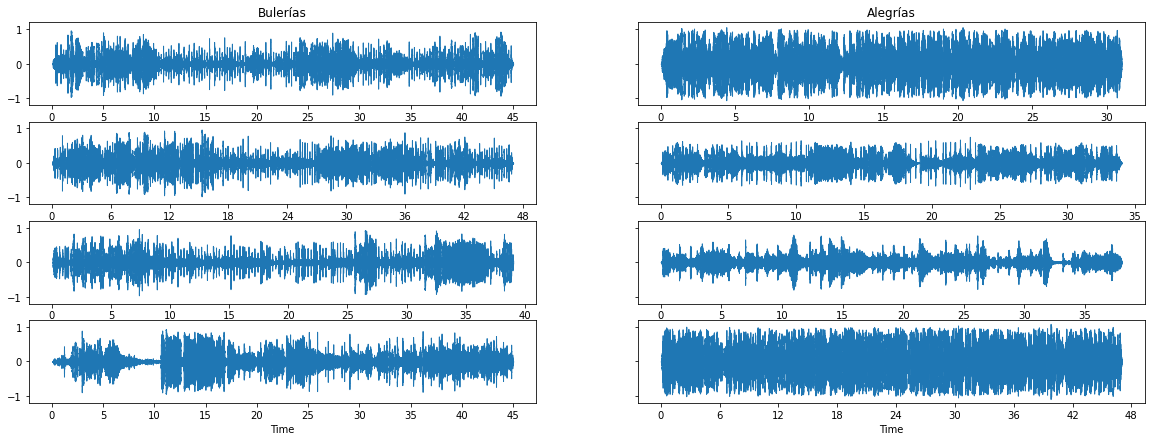

In [7]:
fig, ax = plt.subplots(4, 2, sharey=True, figsize=(20, 7))

ax[0, 0].title.set_text("Bulerías")
ax[0, 1].title.set_text("Alegrías")

for i in range(4):
    bul, sr = bulerias_sample[i]
    ale, sr = alegrias_sample[i]

    librosa.display.waveshow(bul, sr, ax=ax[i, 0])
    librosa.display.waveshow(ale, sr, ax=ax[i, 1])


In [8]:
def show_spectrogram(audio, ax):
    stft = librosa.core.stft(audio)
    dbs = librosa.core.amplitude_to_db(np.abs(stft), np.max)
    return librosa.display.specshow(dbs, ax=ax)

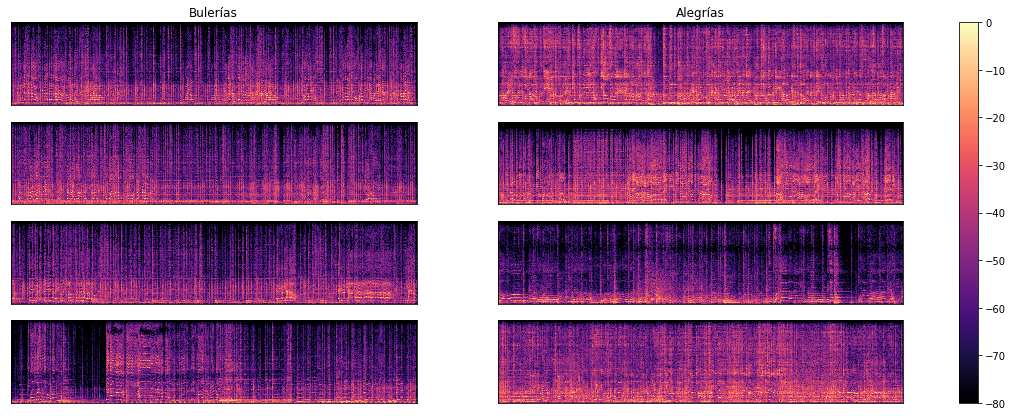

In [9]:
fig, ax = plt.subplots(4, 2, figsize=(20, 7))

ax[0, 0].title.set_text("Bulerías")
ax[0, 1].title.set_text("Alegrías")

for i in range(4):
    bul, _ = bulerias_sample[i]
    ale, _ = alegrias_sample[i]

    show_spectrogram(bul, ax[i, 0])
    fig_1 = show_spectrogram(ale, ax[i, 1])

plt.colorbar(fig_1, ax=fig.get_axes())

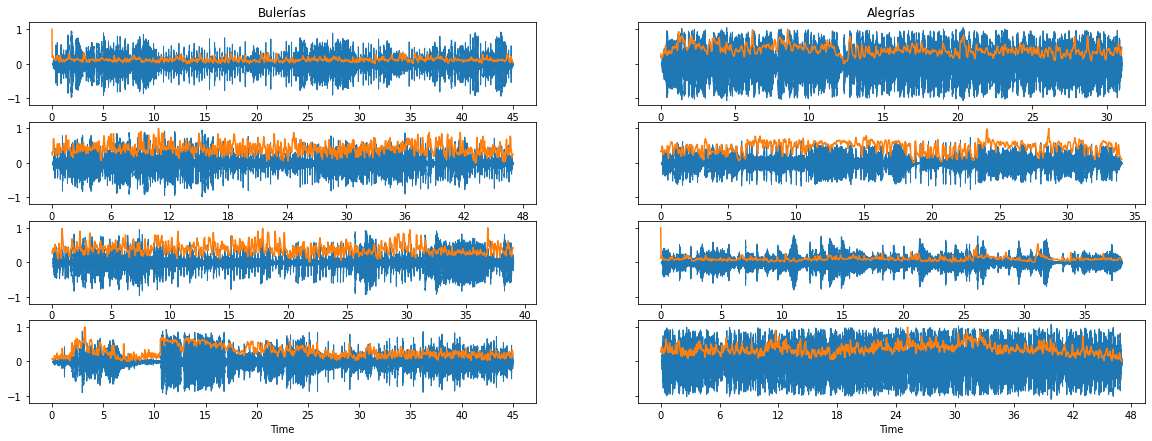

In [10]:
fig, ax = plt.subplots(4, 2, sharey=True, figsize=(20, 7))

ax[0, 0].title.set_text("Bulerías")
ax[0, 1].title.set_text("Alegrías")

for i in range(4):
    bul, sr = bulerias_sample[i]
    ale, sr = alegrias_sample[i]

    sp_b = librosa.feature.spectral_centroid(bul, sr)[0]
    sp_a = librosa.feature.spectral_centroid(ale, sr)[0]

    time_b = librosa.core.frames_to_time(range(len(sp_b)))
    time_a = librosa.core.frames_to_time(range(len(sp_a)))

    centroid_b = minmax_scale(sp_b, axis=0)
    centroid_a = minmax_scale(sp_a, axis=0)

    librosa.display.waveshow(bul, sr, ax=ax[i, 0])
    ax[i,0].plot(time_b, centroid_b)

    librosa.display.waveshow(ale, sr, ax=ax[i, 1])
    ax[i,1].plot(time_a, centroid_a)

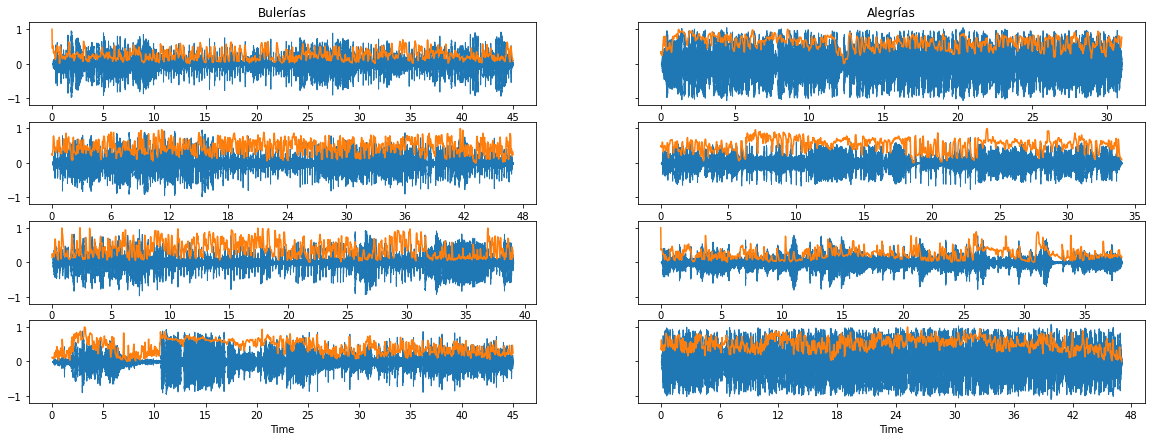

In [11]:
fig, ax = plt.subplots(4, 2, sharey=True, figsize=(20, 7))

ax[0, 0].title.set_text("Bulerías")
ax[0, 1].title.set_text("Alegrías")

for i in range(4):
    bul, sr = bulerias_sample[i]
    ale, sr = alegrias_sample[i]

    sp_b = librosa.feature.spectral_rolloff(bul, sr)[0]
    sp_a = librosa.feature.spectral_rolloff(ale, sr)[0]

    time_b = librosa.core.frames_to_time(range(len(sp_b)))
    time_a = librosa.core.frames_to_time(range(len(sp_a)))

    centroid_b = minmax_scale(sp_b, axis=0)
    centroid_a = minmax_scale(sp_a, axis=0)

    librosa.display.waveshow(bul, sr, ax=ax[i, 0])
    ax[i,0].plot(time_b, centroid_b)

    librosa.display.waveshow(ale, sr, ax=ax[i, 1])
    ax[i,1].plot(time_a, centroid_a)

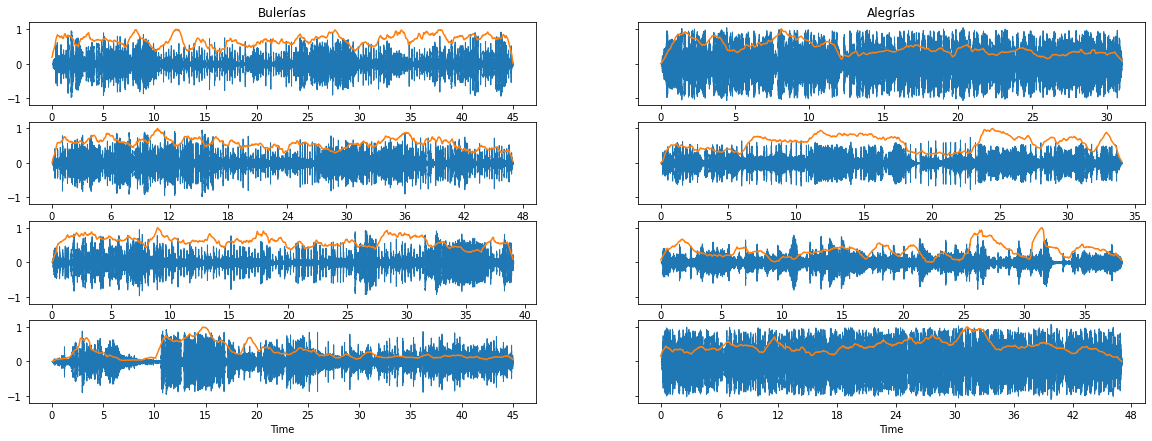

In [12]:
fig, ax = plt.subplots(4, 2, sharey=True, figsize=(20, 7))

ax[0, 0].title.set_text("Bulerías")
ax[0, 1].title.set_text("Alegrías")

for i in range(4):
    bul, sr = bulerias_sample[i]
    ale, sr = alegrias_sample[i]

    sp_b = librosa.feature.zero_crossing_rate(bul, sr)[0]
    sp_a = librosa.feature.zero_crossing_rate(ale, sr)[0]

    time_b = librosa.core.frames_to_time(range(len(sp_b)))
    time_a = librosa.core.frames_to_time(range(len(sp_a)))

    centroid_b = minmax_scale(sp_b, axis=0)
    centroid_a = minmax_scale(sp_a, axis=0)

    librosa.display.waveshow(bul, sr, ax=ax[i, 0])
    ax[i,0].plot(time_b, centroid_b)

    librosa.display.waveshow(ale, sr, ax=ax[i, 1])
    ax[i,1].plot(time_a, centroid_a)

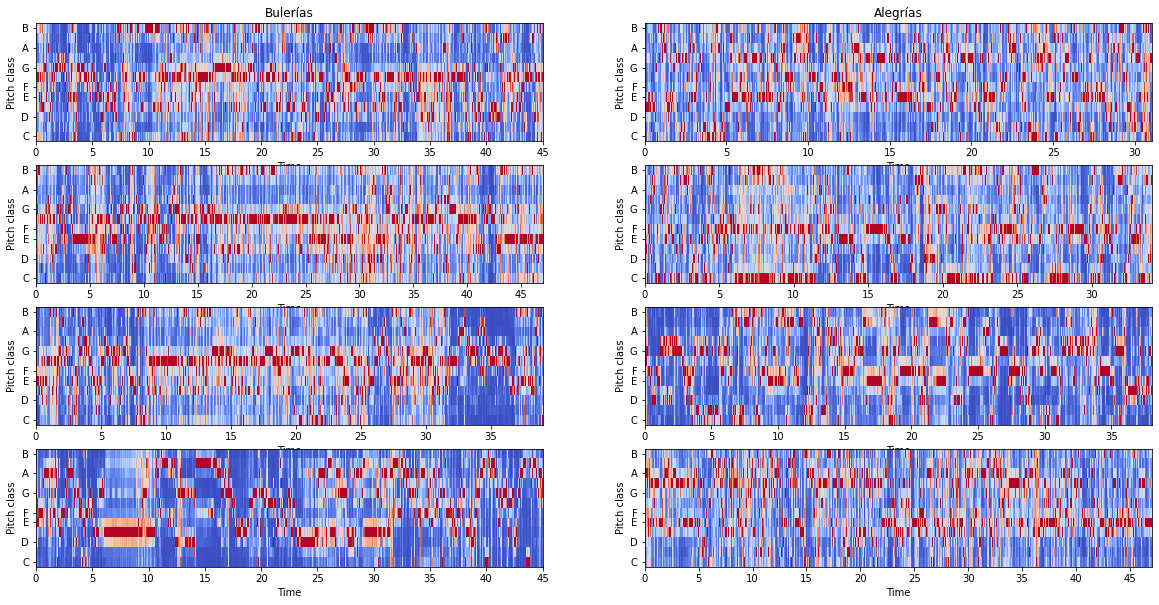

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(20, 10))

ax[0, 0].title.set_text("Bulerías")
ax[0, 1].title.set_text("Alegrías")

for i in range(4):
    bul, sr = bulerias_sample[i]
    ale, sr = alegrias_sample[i]

    cr_b = librosa.feature.chroma_stft(bul, sr)
    cr_a = librosa.feature.chroma_stft(ale, sr)

    librosa.display.specshow(cr_b, ax=ax[i, 0], x_axis='time', y_axis='chroma', cmap='coolwarm')

    librosa.display.specshow(cr_a, ax=ax[i, 1], x_axis='time', y_axis='chroma', cmap='coolwarm')

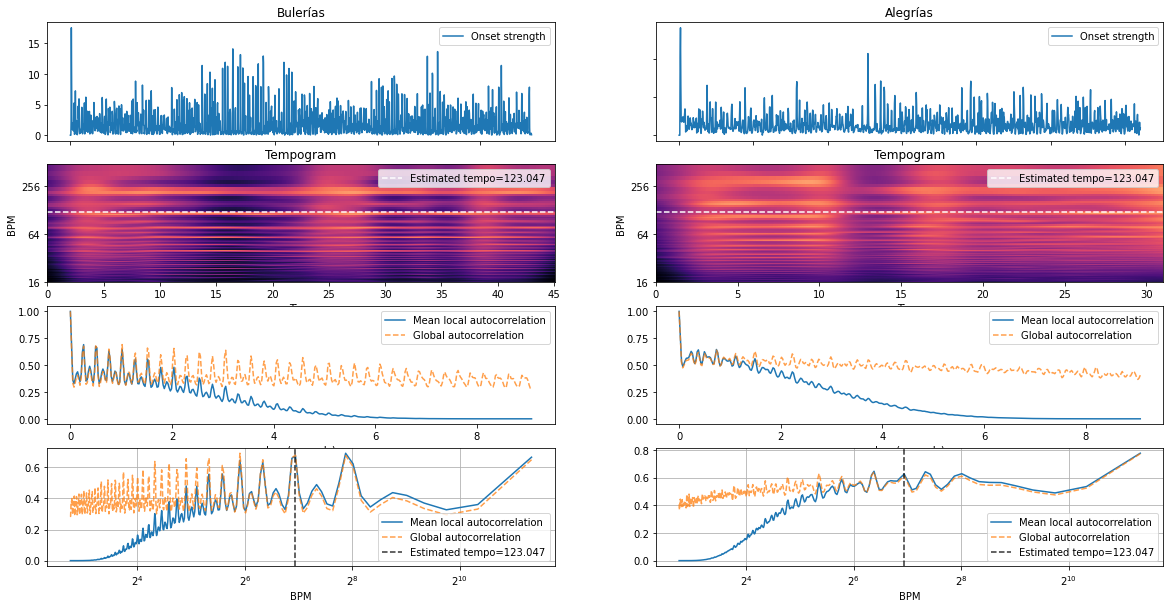

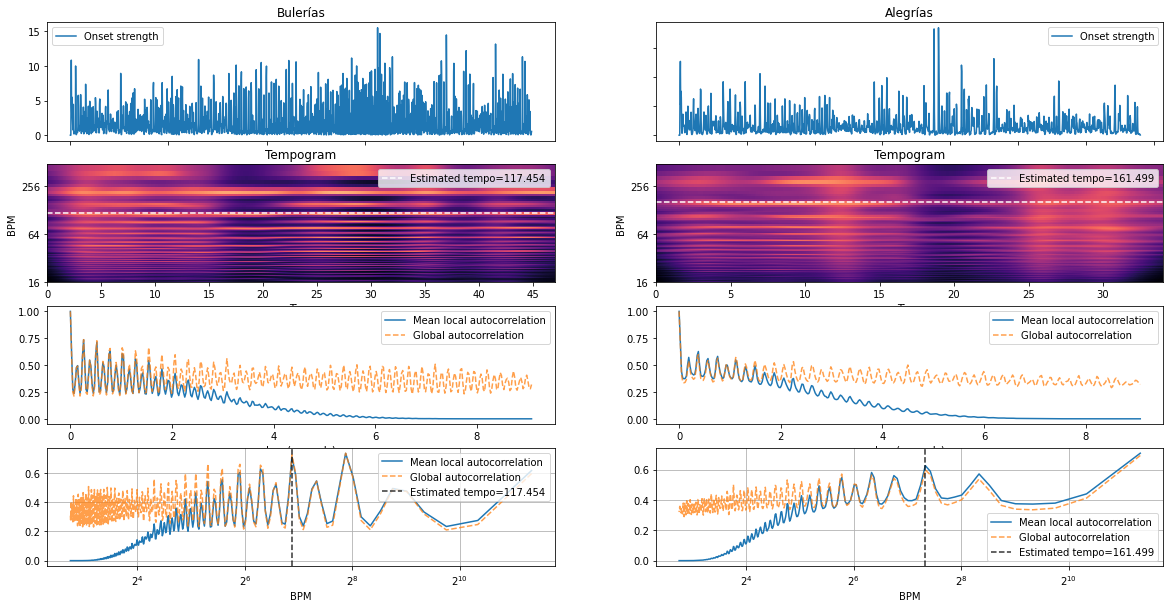

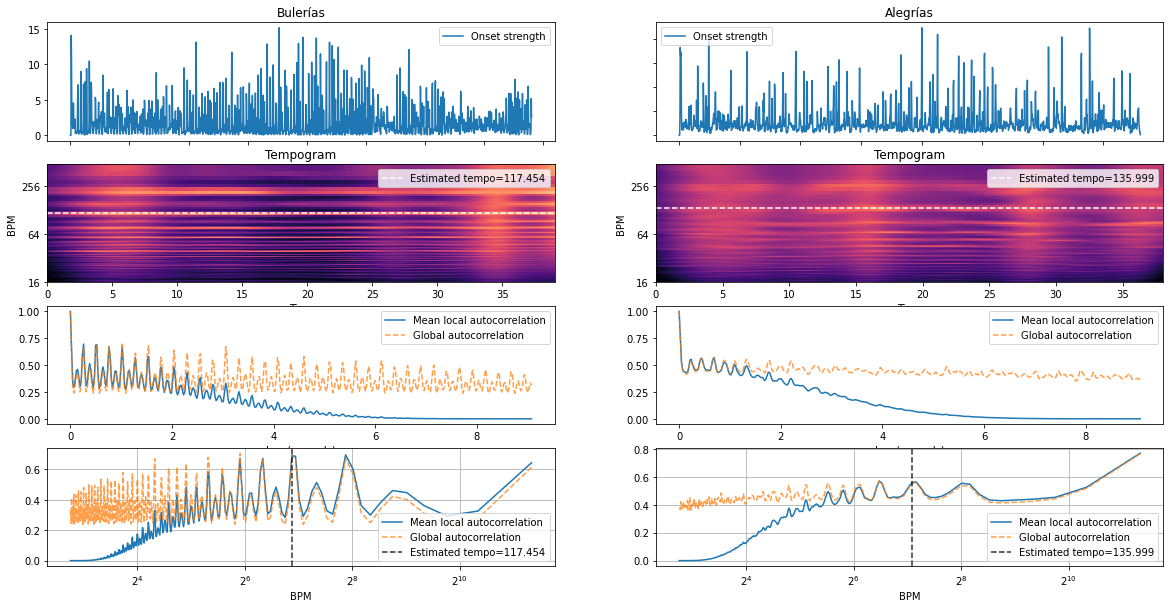

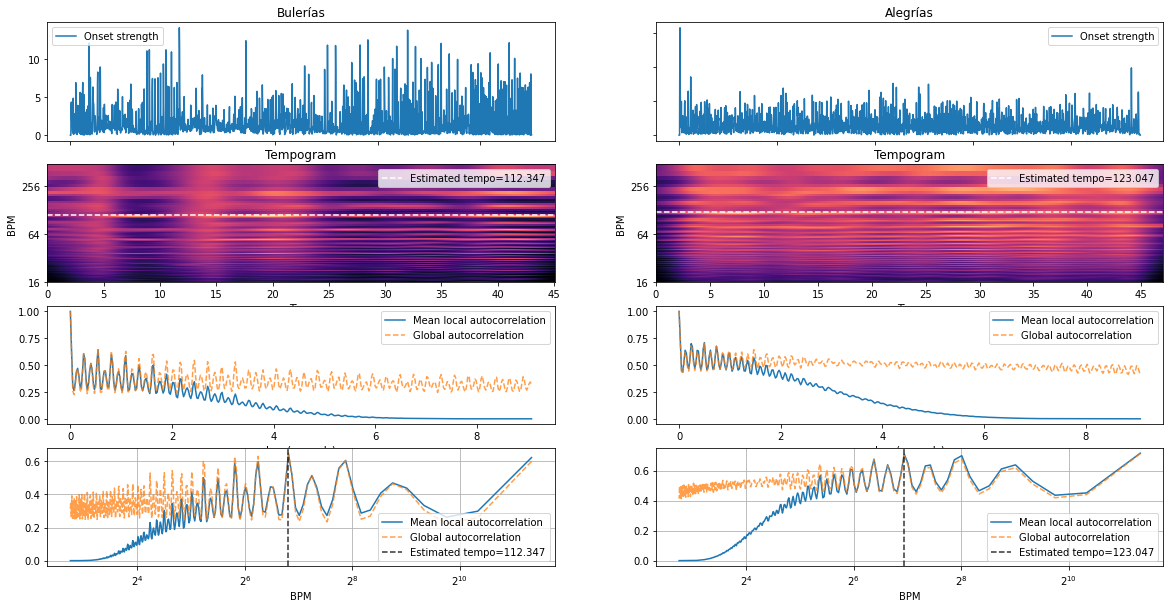

In [14]:
for i in range(4):
    fig, ax = plt.subplots(4, 2, figsize=(20, 10))

    ax[0, 0].title.set_text("Bulerías")
    ax[0, 1].title.set_text("Alegrías")

    bul, sr = bulerias_sample[i]
    ale, sr = alegrias_sample[i]

    oenv_b = librosa.onset.onset_strength(y=bul, sr=sr)
    oenv_a = librosa.onset.onset_strength(y=ale, sr=sr)

    tempogram_b = librosa.feature.tempogram(onset_envelope=oenv_b, sr=sr)
    tempogram_a = librosa.feature.tempogram(onset_envelope=oenv_a, sr=sr)

    ac_global_b = librosa.util.normalize(librosa.autocorrelate(oenv_b, max_size=tempogram_b.shape[0]))
    ac_global_a = librosa.util.normalize(librosa.autocorrelate(oenv_a, max_size=tempogram_a.shape[0]))

    tempo_b = librosa.beat.tempo(onset_envelope=oenv_b, sr=sr)[0]
    tempo_a = librosa.beat.tempo(onset_envelope=oenv_a, sr=sr)[0]

    times_b = librosa.times_like(oenv_b, sr=sr)
    times_a = librosa.times_like(oenv_a, sr=sr)

    ax[0,0].plot(times_b, oenv_b, label='Onset strength')
    ax[0,0].label_outer()
    ax[0,0].legend(frameon=True)

    ax[0,1].plot(times_a, oenv_a, label='Onset strength')
    ax[0,1].label_outer()
    ax[0,1].legend(frameon=True)

    librosa.display.specshow(tempogram_b, sr=sr, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1, 0])
    ax[1, 0].axhline(tempo_b, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo_b))
    ax[1, 0].legend(loc='upper right')
    ax[1, 0].set(title='Tempogram')

    librosa.display.specshow(tempogram_a, sr=sr, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[1, 1])
    ax[1, 1].axhline(tempo_a, color='w', linestyle='--', alpha=1, label='Estimated tempo={:g}'.format(tempo_a))
    ax[1, 1].legend(loc='upper right')
    ax[1, 1].set(title='Tempogram')
    
    x_b = np.linspace(0, tempogram_b.shape[0] * float(521) / sr, num=tempogram_b.shape[0])
    ax[2, 0].plot(x_b, np.mean(tempogram_b, axis=1), label='Mean local autocorrelation')
    ax[2, 0].plot(x_b, ac_global_b, '--', alpha=0.75, label='Global autocorrelation')
    ax[2, 0].set(xlabel='Lag (seconds)')
    ax[2, 0].legend(frameon=True)

    x_a = np.linspace(0, tempogram_a.shape[0] * float(521) / sr, num=tempogram_a.shape[0])
    ax[2, 1].plot(x_a, np.mean(tempogram_a, axis=1), label='Mean local autocorrelation')
    ax[2, 1].plot(x_a, ac_global_a, '--', alpha=0.75, label='Global autocorrelation')
    ax[2, 1].set(xlabel='Lag (seconds)')
    ax[2, 1].legend(frameon=True)


    freqs_b = librosa.tempo_frequencies(tempogram_b.shape[0], sr=sr)
    ax[3, 0].semilogx(freqs_b[1:], np.mean(tempogram_b[1:], axis=1), label='Mean local autocorrelation', basex=2)
    ax[3, 0].semilogx(freqs_b[1:], ac_global_b[1:], '--', alpha=0.75, label='Global autocorrelation', basex=2)
    ax[3, 0].axvline(tempo_b, color='black', linestyle='--', alpha=.8, label='Estimated tempo={:g}'.format(tempo_b))
    ax[3, 0].legend(frameon=True)
    ax[3, 0].set(xlabel='BPM')
    ax[3, 0].grid(True)

    freqs_a = librosa.tempo_frequencies(tempogram_a.shape[0], sr=sr)
    ax[3, 1].semilogx(freqs_a[1:], np.mean(tempogram_a[1:], axis=1), label='Mean local autocorrelation', basex=2)
    ax[3, 1].semilogx(freqs_a[1:], ac_global_a[1:], '--', alpha=0.75, label='Global autocorrelation', basex=2)
    ax[3, 1].axvline(tempo_a, color='black', linestyle='--', alpha=.8, label='Estimated tempo={:g}'.format(tempo_a))
    ax[3, 1].legend(frameon=True)
    ax[3, 1].set(xlabel='BPM')
    ax[3, 1].grid(True)

    plt.show()

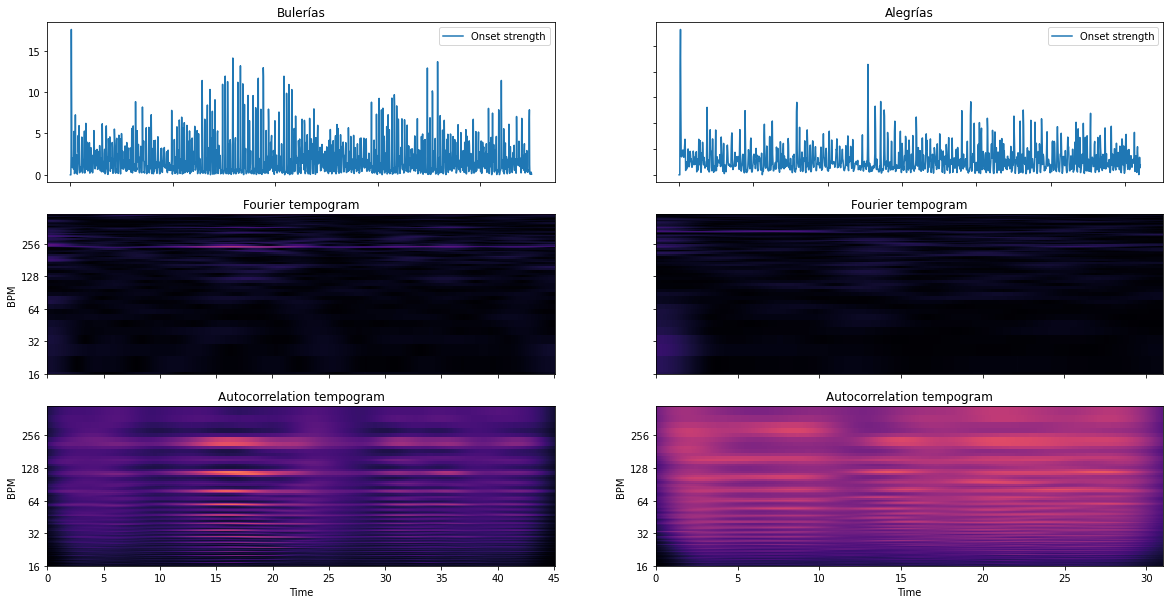

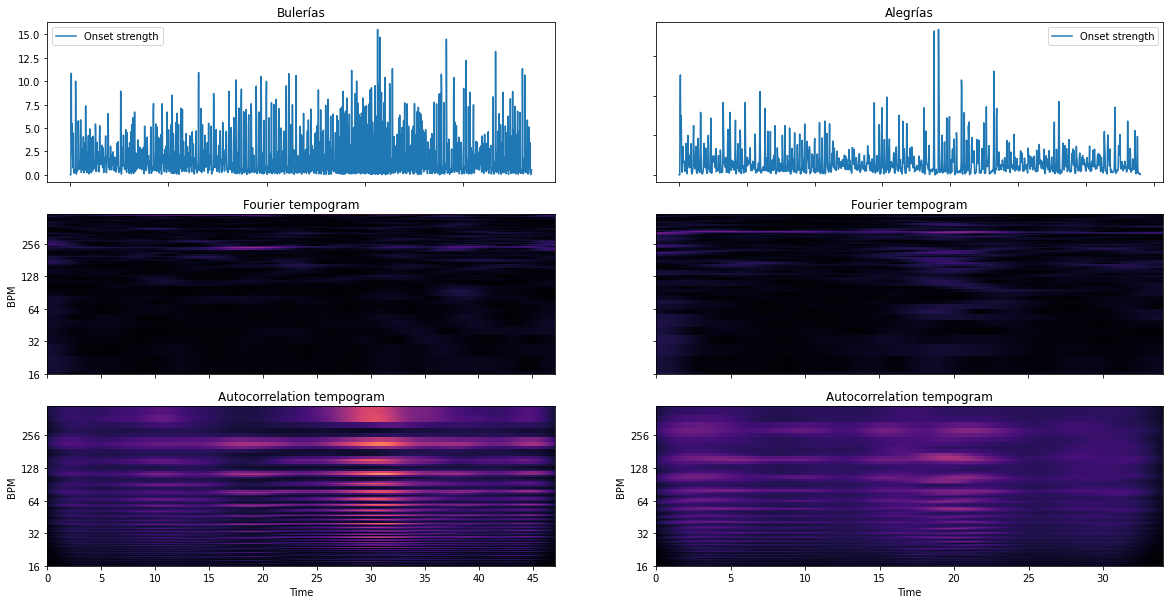

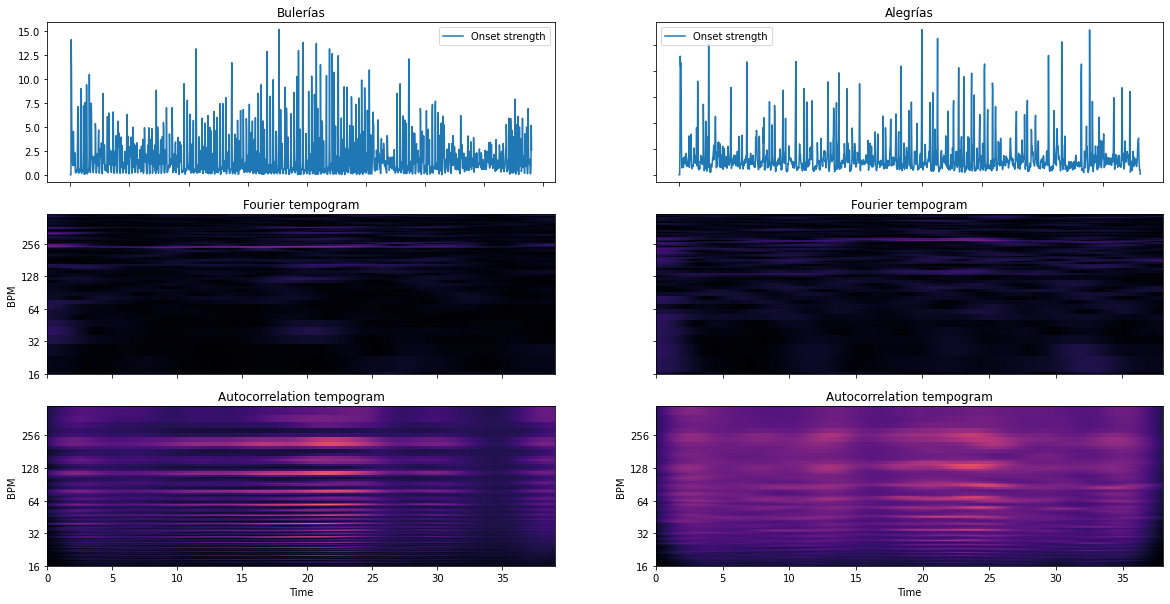

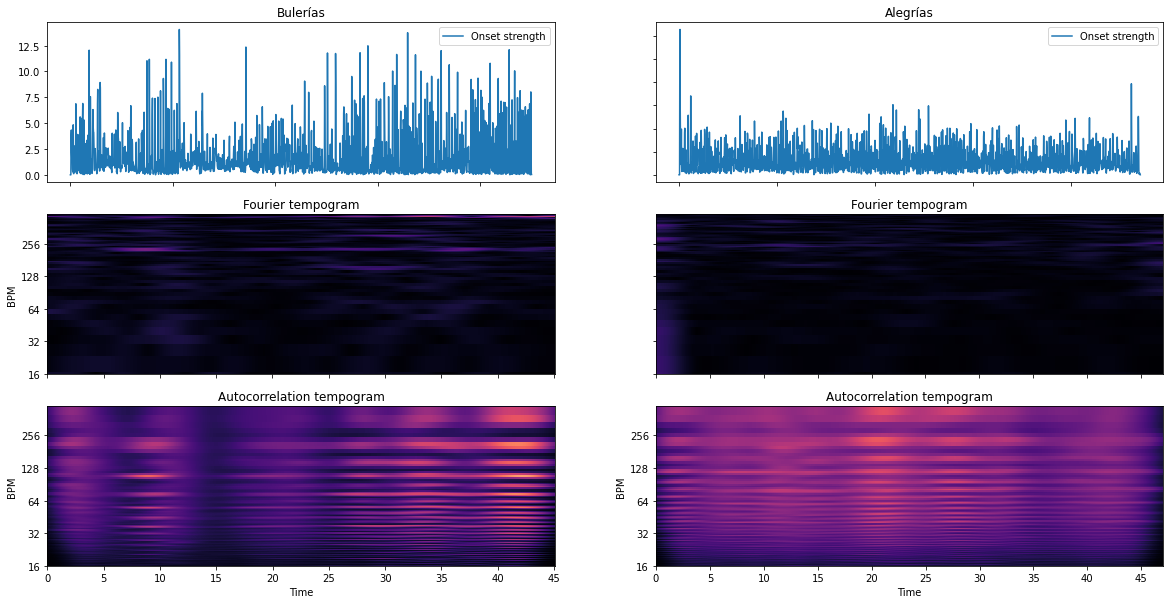

In [15]:
for i in range(4):
    fig, ax = plt.subplots(3, 2, figsize=(20, 10))

    ax[0, 0].title.set_text("Bulerías")
    ax[0, 1].title.set_text("Alegrías")

    bul, sr = bulerias_sample[i]
    ale, sr = alegrias_sample[i]

    oenv_b = librosa.onset.onset_strength(y=bul, sr=sr)
    oenv_a = librosa.onset.onset_strength(y=ale, sr=sr)

    tempogram_b = librosa.feature.fourier_tempogram(onset_envelope=oenv_b, sr=sr)
    tempogram_a = librosa.feature.fourier_tempogram(onset_envelope=oenv_a, sr=sr)

    ac_tempogram_b = librosa.feature.tempogram(onset_envelope=oenv_b, sr=sr, norm=None)
    ac_tempogram_a = librosa.feature.tempogram(onset_envelope=oenv_a, sr=sr, norm=None)

    ax[0,0].plot(librosa.times_like(oenv_b), oenv_b, label='Onset strength')
    ax[0,0].label_outer()
    ax[0,0].legend(frameon=True)

    ax[0,1].plot(librosa.times_like(oenv_a), oenv_a, label='Onset strength')
    ax[0,1].label_outer()
    ax[0,1].legend(frameon=True)

    librosa.display.specshow(np.abs(tempogram_b), sr=sr, x_axis='time', y_axis='fourier_tempo', cmap='magma', ax=ax[1, 0])
    ax[1, 0].set(title='Fourier tempogram')
    ax[1, 0].label_outer()
    
    librosa.display.specshow(np.abs(tempogram_a), sr=sr, x_axis='time', y_axis='fourier_tempo', cmap='magma', ax=ax[1, 1])
    ax[1, 1].set(title='Fourier tempogram')
    ax[1, 1].label_outer()

    librosa.display.specshow(ac_tempogram_b, sr=sr, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[2, 0])
    ax[2, 0].set(title='Autocorrelation tempogram')
    
    librosa.display.specshow(ac_tempogram_a, sr=sr, x_axis='time', y_axis='tempo', cmap='magma', ax=ax[2, 1])
    ax[2, 1].set(title='Autocorrelation tempogram')

    plt.show()

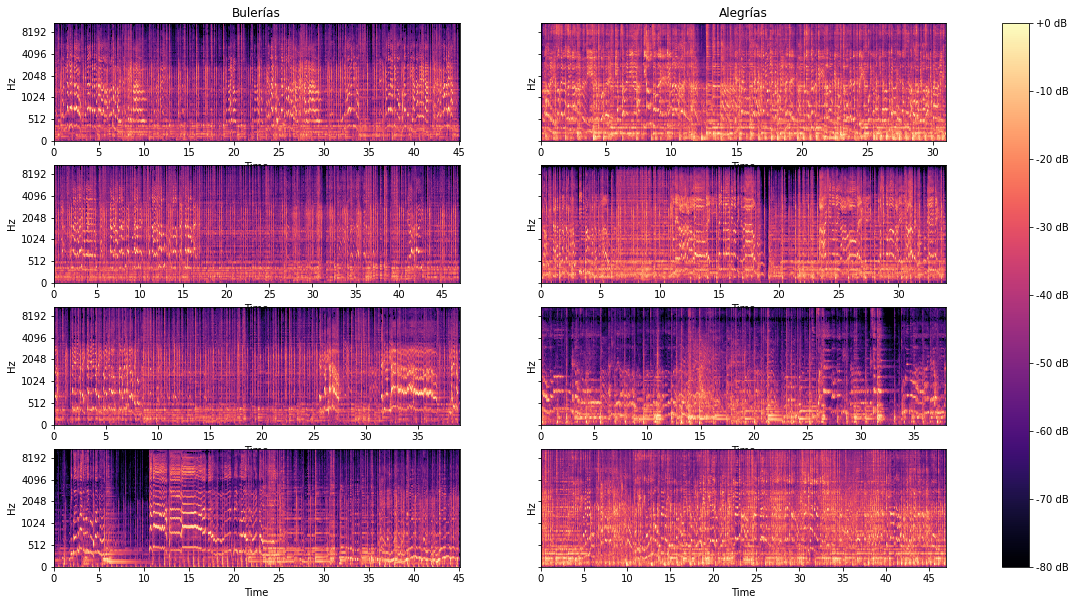

In [28]:
fig, ax = plt.subplots(4, 2, sharey=True, figsize=(20, 10))

ax[0, 0].title.set_text("Bulerías")
ax[0, 1].title.set_text("Alegrías")

for i in range(4):
    bul, sr_b = bulerias_sample[i]
    ale, sr_a = alegrias_sample[i]

    mels_b = librosa.feature.melspectrogram(bul, sr_b)
    mels_db_b = librosa.core.power_to_db(mels_b, ref=np.max)

    mels_a = librosa.feature.melspectrogram(ale, sr_a)
    mels_db_a = librosa.core.power_to_db(mels_a, ref=np.max)

    fig_1 = librosa.display.specshow(mels_db_b, ax=ax[i, 0], x_axis='time', y_axis='mel', cmap='magma', sr=sr_b)
    librosa.display.specshow(mels_db_a, ax=ax[i, 1], x_axis='time', y_axis='mel', cmap='magma', sr=sr_a)

plt.colorbar(fig_1, ax=fig.get_axes(), format='%+2.0f dB')

In [4]:
audios_folder = '../../assets/audios/'
data_folder = '../../assets/dataset/'

for top_path, folders, _ in os.walk(audios_folder):
    for folder in folders:
        for _, _, files in os.walk(os.path.join(top_path, folder)):
            for file in files:
                if not file.endswith('.mp3') or folder != "sevillanas":
                    continue

                audio, sr = librosa.core.load(os.path.abspath(os.path.join(top_path, folder, file)))

                mels = librosa.feature.melspectrogram(audio, sr)
                mels_db = librosa.core.power_to_db(mels, ref=np.max)

                fig = plt.figure()
                fig.set_size_inches((16,9))
                ax = plt.Axes(fig, [0., 0., 1., 1.])
                ax.set_axis_off()
                fig.add_axes(ax)
                ax.imshow(mels_db, aspect='auto', interpolation='nearest')
                plt.savefig(
                    os.path.abspath(
                        os.path.join(
                            data_folder, 
                            'train', 
                            folder, 
                            f"meslpectrogram-{'.'.join(file.split('.')[:-1])}.png"
                        )
                    ),
                    bbox_inches='tight',
                    dpi=100
                )
                plt.close(fig)
                plt.clf()

<Figure size 432x288 with 0 Axes>

In [5]:
audios_folder = '../../assets/audios/'
data_folder = '../../assets/dataset/'
counter = 0

for top_path, folders, _ in os.walk(audios_folder):
    for folder in folders:
        for _, _, files in os.walk(os.path.join(top_path, folder)):
            for file in files:
                if not file.endswith('.mp3'):
                    continue

                if folder != "sevillanas":
                    continue

                audio, sr = librosa.core.load(os.path.abspath(os.path.join(top_path, folder, file)))

                oenv = librosa.onset.onset_strength(y=audio, sr=sr)

                ac_tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr, norm=None)

                fig = plt.figure()
                fig.set_size_inches((16,9))
                ax = plt.Axes(fig, [0., 0., 1., 1.])
                ax.set_axis_off()
                fig.add_axes(ax)
                librosa.display.specshow(ac_tempogram, sr=sr, x_axis='time', y_axis='tempo', cmap='magma', ax=ax)
                plt.savefig(
                    os.path.abspath(
                        os.path.join(
                            data_folder, 
                            'train', 
                            folder, 
                            f"ac-tempogram-{'.'.join(file.split('.')[:-1])}.png"
                        )
                    ),
                    bbox_inches='tight',
                    dpi=100
                )
                plt.close(fig)
                print(counter)
                counter += 1

412
413
414
415
416
417
418
419
420
421
422
423
424
425
426
427
428
429
430
431
432
433
434
435
436
437
438
439
440
441
442
443
444
445
446
447
448
449
450
451
452
453
454
455
456
457
458
459
460
461
462
463
464
465
466
467
468
469
470
471
472
473
474
475
476
477
478
479
480
481
482
483
484
485
486
487
488
489
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516


In [6]:
audios_folder = '../../assets/audios/'
data_folder = '../../assets/dataset/'
counter = 0

for top_path, folders, _ in os.walk(audios_folder):
    for folder in folders:
        for _, _, files in os.walk(os.path.join(top_path, folder)):
            for file in files:
                if not file.endswith('.mp3'):
                    continue

                if folder != "sevillanas":
                    continue

                audio, sr = librosa.core.load(os.path.abspath(os.path.join(top_path, folder, file)))

                oenv = librosa.onset.onset_strength(y=audio, sr=sr)

                tempogram = librosa.feature.tempogram(onset_envelope=oenv, sr=sr)

                fig = plt.figure()
                fig.set_size_inches((16,9))
                ax = plt.Axes(fig, [0., 0., 1., 1.])
                ax.set_axis_off()
                fig.add_axes(ax)
                librosa.display.specshow(tempogram, sr=sr, x_axis='time', y_axis='tempo', cmap='magma', ax=ax)
                plt.savefig(
                    os.path.abspath(
                        os.path.join(
                            data_folder, 
                            'train', 
                            folder, 
                            f"tempogram-{'.'.join(file.split('.')[:-1])}.png"
                        )
                    ),
                    bbox_inches='tight',
                    dpi=100
                )
                plt.close(fig)
                print(counter)
                counter += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [10]:
audios_folder = '../../assets/audios/'
data_folder = '../../assets/img/tmp'
counter = 0

for top_path, folders, _ in os.walk(audios_folder):
    for folder in folders:
        for _, _, files in os.walk(os.path.join(top_path, folder)):
            for file in files:
                if not file.endswith('.mp3'):
                    continue

                audio, sr = AudioSegment.from_mp3(os.path.abspath(os.path.join(top_path, folder, file))), 48000
                audio = np.array(audio.get_array_of_samples(), dtype=np.float32)
                cr = librosa.feature.chroma_stft(audio, sr)

                fig = plt.figure()
                fig.set_size_inches((16,9))
                ax = plt.Axes(fig, [0., 0., 1., 1.])
                ax.set_axis_off()
                fig.add_axes(ax)
                librosa.display.specshow(cr, ax=ax, x_axis='time', y_axis='chroma', cmap='coolwarm')
                plt.savefig(
                    os.path.abspath(
                        os.path.join(
                            data_folder,
                            folder, 
                            f"chromagram-{'.'.join(file.split('.')[:-1])}.png"
                        )
                    ),
                    bbox_inches='tight',
                    dpi=100
                )
                plt.close(fig)
                print(counter)
                counter += 1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [9]:
data_folder = '../../assets/dataset/'

for top_path, folders, _ in os.walk(os.path.join(data_folder, 'train')):
    for folder in folders:
        if folder != "sevillanas":
            continue
        for _, _, files in os.walk(os.path.join(top_path, folder)):
            ac_tempograms = list(filter(lambda file: file.startswith("ac-tempogram") and file.endswith(".png"), files))
            melspectrograms = list(filter(lambda file: file.startswith("meslpectrogram") and file.endswith(".png"), files))
            tempograms = list(filter(lambda file: file.startswith("tempogram") and file.endswith(".png"), files))

            test_files = (
                random.sample(ac_tempograms, math.floor(len(ac_tempograms) * .2)) 
                + random.sample(melspectrograms, math.floor(len(melspectrograms) * .2)) 
                + random.sample(tempograms, math.floor(len(tempograms) * .2))
            )

            for file in test_files:
                if not file.endswith('.png'):
                    continue
                
                shutil.move(
                    os.path.join(data_folder, 'train', folder, file),
                    os.path.join(data_folder, 'test', folder, file)
                )